#[실전예제]헬스케어 - 질병 데이터분석 '코로나 바이러스'

#코로나 바이러스 데이터 분석 - 환경 설정 및 데이터 구조 파악


##1. 라이브러리 import 및 데이터 업로드

###라이브러리 import

In [1]:
import pandas as pd
import matplotlib as mpl #시각화를 위한 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns
import folium # 지도 시각화


import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###csv 파일 업로드

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

## 2. 데이터 구조 파악하기

###데이터 pandas로 불러오기

In [0]:
coronaDF = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
import os
os.getcwd()

'C:\\Users\\ymlee\\fastcampus\\08. Part5.[실전예제_헬스케어] 질병 데이터 분석 - 코로나 바이러스'

In [6]:
coronaDF = pd.read_csv('COVID_Data_Basic.csv') #csv 빠지지 않도록 주의!

###데이터 확인하기

In [25]:
coronaDF.drop('Unnamed: 0', axis = 1, inplace=True)
coronaDF

KeyError: "['Unnamed: 0'] not found in axis"

In [26]:
coronaDF

,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,Afghanistan,2019-12-31,0,0,0,0,0,0
1,Afghanistan,2020-01-01,0,0,0,0,0,0
2,Afghanistan,2020-01-02,0,0,0,0,0,0
3,Afghanistan,2020-01-03,0,0,0,0,0,0
4,Afghanistan,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
54517,Zimbabwe,2020-11-02,8389,245,7939,15,2,12
54518,Zimbabwe,2020-11-03,8410,246,7942,21,1,3
54519,Zimbabwe,2020-11-04,8427,248,7967,17,2,25
54520,Zimbabwe,2020-11-05,8444,248,7975,17,0,8


###결측 값 확인

In [27]:
coronaDF.isnull().sum()

Country         0
Date            0
Confirmed       0
Death           0
Recovered       0
newConfirmed    0
newDeath        0
newRecovered    0
dtype: int64

### 데이터 타입 조회

In [9]:
coronaDF.info()
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    54522 non-null  int64 
 1   Country       54522 non-null  object
 2   Date          54522 non-null  object
 3   Confirmed     54522 non-null  int64 
 4   Death         54522 non-null  int64 
 5   Recovered     54522 non-null  int64 
 6   newConfirmed  54522 non-null  int64 
 7   newDeath      54522 non-null  int64 
 8   newRecovered  54522 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    54522 non-null  int64 
 1   Country       54522 non-null  object
 2   Date          54522 non-null  object
 3   Confirmed     54522 non-null  int64 
 4   Death         5

### Date 정보 수정 (Object => datetime)

In [28]:
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])
coronaDF['Date'] = pd.to_datetime(coronaDF['Date'])

In [29]:
coronaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54522 entries, 0 to 54521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Country       54522 non-null  object        
 1   Date          54522 non-null  datetime64[ns]
 2   Confirmed     54522 non-null  int64         
 3   Death         54522 non-null  int64         
 4   Recovered     54522 non-null  int64         
 5   newConfirmed  54522 non-null  int64         
 6   newDeath      54522 non-null  int64         
 7   newRecovered  54522 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 3.3+ MB


In [ ]:
# 데이터명.copy()

# 코로나 바이러스 데이터 분석 - 국가별 최신 확진자, 사망자, 회복자 데이터 분석



### 최신 데이터만 남기기

In [30]:
latestDF = coronaDF[coronaDF['Date'] == max(coronaDF['Date'])]

In [31]:
latestDF

,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
10673,Afghanistan,2020-11-06,41975,1554,34440,40,0,0
10905,Albania,2020-11-06,23210,549,11861,489,6,165
11137,Algeria,2020-11-06,60800,2024,41510,631,13,266
11369,Andorra,2020-11-06,5135,75,3858,0,0,0
11601,Angola,2020-11-06,12223,300,5626,121,1,276
...,...,...,...,...,...,...,...,...
53593,West Bank and Gaza,2020-11-06,57226,511,49537,554,3,857
53825,Western Sahara,2020-11-06,10,1,8,0,0,0
54057,Yemen,2020-11-06,2067,602,1375,4,1,0
54289,Zambia,2020-11-06,16819,349,15862,49,0,35


### 국가별 합계 구하기

In [33]:
latest_country_sum = latestDF.groupby('Country')['Confirmed', 'Death', 'Recovered'].sum().reset_index()
latest_country_sum

<ipython-input-33-f6cdbab54689>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latest_country_sum = latestDF.groupby('Country')['Confirmed', 'Death', 'Recovered'].sum().reset_index()


,Country,Confirmed,Death,Recovered
0,Afghanistan,41975,1554,34440
1,Albania,23210,549,11861
2,Algeria,60800,2024,41510
3,Andorra,5135,75,3858
4,Angola,12223,300,5626
...,...,...,...,...
185,West Bank and Gaza,57226,511,49537
186,Western Sahara,10,1,8
187,Yemen,2067,602,1375
188,Zambia,16819,349,15862


### 사망자 높은 국가순으로 정렬하기

In [36]:
latest_country_sum = latest_country_sum.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)

### 데이터 전체 조회하기


In [35]:
latest_country_sum.style.background_gradient(cmap='Reds')

,Country,Confirmed,Death,Recovered
0,US,9733816,236073,3810791
1,India,8462080,125562,7819886
2,Brazil,5631181,162015,5118156
3,Russia,1720063,29654,1288096
4,France,1709716,39916,131810
5,Spain,1328832,38833,150376
6,Argentina,1228814,33136,1042237
7,United Kingdom,1149791,48565,2951
8,Colombia,1127733,32405,1020263
9,Mexico,955128,94323,812556


# 코로나 바이러스 데이터 분석 - 시간에 따른 확진자, 사망자, 회복자 시각화

###날짜별 확진자, 사망자, 회복자 합계 구하기

In [37]:
# 날짜 별로 확진자 구하기 -> 그룹바이 사용
date_status = coronaDF.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()
date_status = date_status.sort_index()
date_status

<ipython-input-37-6a28ac3f6b5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  date_status = coronaDF.groupby('Date')['Confirmed', 'Death', 'Recovered'].sum()


,Confirmed,Death,Recovered
Date,,,
2019-12-31,27,0,0
2020-01-01,27,0,0
2020-01-02,27,0,0
2020-01-03,44,0,0
2020-01-04,44,0,0
...,...,...,...
2020-11-02,47011161,1206168,31357886
2020-11-03,47493178,1214178,31609242
2020-11-04,48090690,1225202,31889030


### 시간에 따른 누적 확진자, 사망자, 회복자 그래프 (seaborn lineplot)

<AxesSubplot:xlabel='Date'>

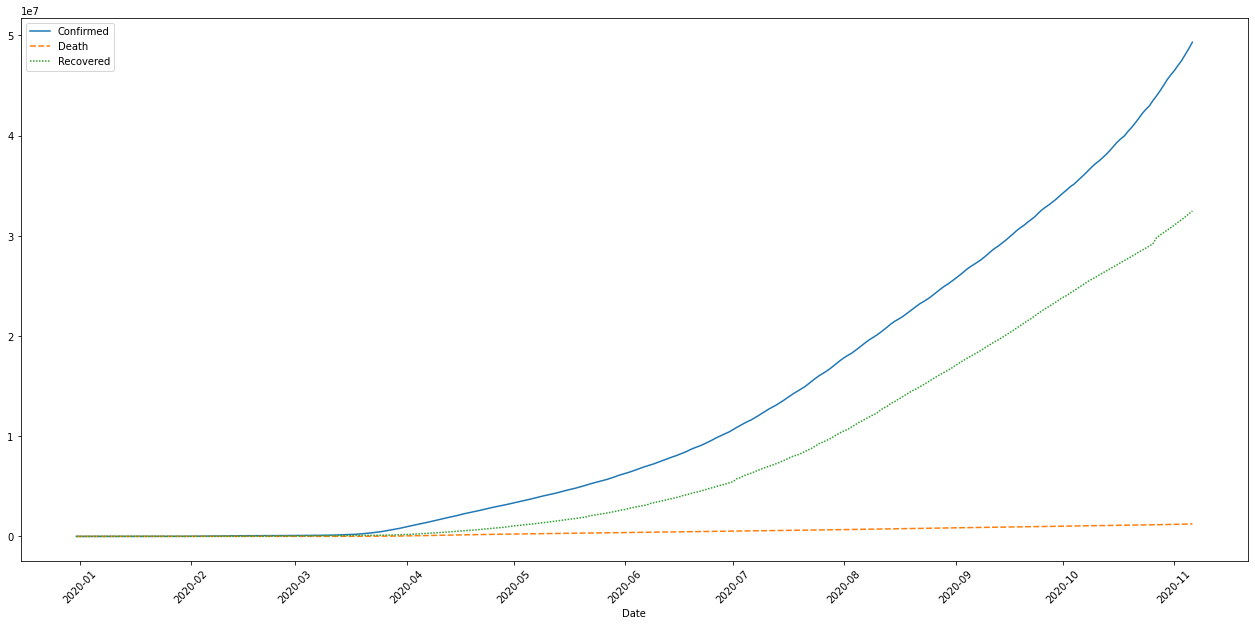

In [41]:
plt.figure(figsize=(22,10))
plt.xticks(rotation = 45 ) #x축 글씨 너무 겹치면 회전 각도 조절해서 사용. 
sns.lineplot(data=date_status)

# 전세계 코로나 바이러스 감염 지도 표시 - folium 라이브러리 소개 및 설명

### folium 사용해보기

In [42]:
import folium
m = folium.Map()
m
#처음엔 아무것도 없지만, 옵션을 주면서 점점 추가할 수 있다.


### folium으로 서울 지도 표시하기

In [44]:
m = folium.Map(location=[37.5662952, 126.9779451])
m

# 
# 37.715133, 126.734086


### zoom 조절하기

In [46]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=18) # 숫자 만큼의 줌이 일어남
m

### CircleMarker 그리기

In [47]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100).add_to(m) #반지름 100
m

### CircleMarker 색상, 채우기, 채우기 색상 설정

In [48]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008").add_to(m)
m

### CircleMarker로 popup 표시

In [54]:
m = folium.Map(location=[37.559533, 126.972464], zoom_start=16)
folium.CircleMarker([37.559533, 126.972464], radius=100, color="#ef9008", fill="True", fill_color="#ef9008", popup="hi :)").add_to(m)
m

#전세계 코로나 바이러스 감염 지도 표시 - 전세계 코로나 바이러스 감염 지도 시각화

### 국가별 최신 확진자 데이터 조회

In [50]:
latestDF

,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
10673,Afghanistan,2020-11-06,41975,1554,34440,40,0,0
10905,Albania,2020-11-06,23210,549,11861,489,6,165
11137,Algeria,2020-11-06,60800,2024,41510,631,13,266
11369,Andorra,2020-11-06,5135,75,3858,0,0,0
11601,Angola,2020-11-06,12223,300,5626,121,1,276
...,...,...,...,...,...,...,...,...
53593,West Bank and Gaza,2020-11-06,57226,511,49537,554,3,857
53825,Western Sahara,2020-11-06,10,1,8,0,0,0
54057,Yemen,2020-11-06,2067,602,1375,4,1,0
54289,Zambia,2020-11-06,16819,349,15862,49,0,35


### 지도에 전세계 국가별 확진자 수 CircleMarker로 표시

In [56]:
m = folium.Map(location=[0, 0], zoom_start=4)
for n in latestDF.index:
    folium.CircleMarker([latestDF['newConfirmed'][n], latestDF['Confirmed'][n]], radius = int(latestDF['Confirmed'][n]/1000)
    , color='red', fill="True", fill_color='red', popup=latestDF['Country'][n] + ":" + str(latestDF['Confirmed'][n])).add_to(m)
m

# 위도,경도 작성해야 하는데 테이블 데이터에 위도 경도가 없음... 
# latestDF['newConfirmed'][n] 대신 위도, 
# latestDF['Confirmed'][n] 대신 경도